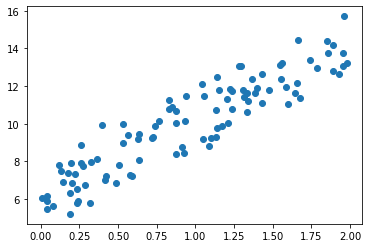

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y=4x+6을 근사(w1=4, w0=6), 임의의 값은 노이즈를 위해 만듦
X= 2*np.random.rand(100,1)
y= 6+4*X+np.random.randn(100,1)

plt.scatter(X,y)

In [12]:
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [21]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N=len(y)
    #w1_update, w2_update를 각각 w1, w0와 동일한 shape을 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    #예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X,w1.T)+w0
    diff = y-y_pred
    
    #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    
    return w1_update, w0_update

In [22]:
def gradient_descent_steps(X,y,iters=10000):
    w0= np.zeros((1,1))
    w1= np.zeros((1,1))
    
    #인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1,w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
        
    return w1, w0
    
    

In [24]:
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1,w0 = gradient_descent_steps(X,y,iters=1000)
print('w1:{} w0:{}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0]*X+w0
print('Gradient Descent Total Cost:{}'.format(get_cost(y,y_pred)))

w1:4.021813642697164 w0:6.162031224717461
Gradient Descent Total Cost:0.9934784315632568


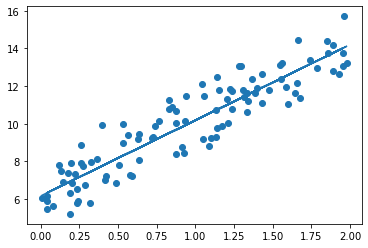

In [25]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [26]:
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
    w0= np.zeros((1,1))
    w1= np.zeros((1,1))
    prev_cost= 100000
    iter_index= 0
    
    for ind in range(iters):
        np.random.seed(ind)
        #전체 X, y 데이터에서 랜덤하게 batch_size만큼 추출해서 sample_x, sample_y에 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
        
    return w1, w0
    

In [27]:
w1,w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
print('w1:{} w0:{}'.format(round(w1[0,0],3),round(w0[0,0],3)))
y_pred = w1[0,0]*X+w0
print('Stochastic Gradient Descent Total Cost:{}'.format(get_cost(y,y_pred)))

w1:4.028 w0:6.156
Stochastic Gradient Descent Total Cost:0.9937111256675345


In [29]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성, [[0,1],[2,3,]]의 2*2 행렬
X= np.arange(4).reshape(2,2)
print(X)

#degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n',poly_ftr)

[[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [31]:
def polynomial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

X= np.arange(4).reshape(2,2)
print(X)
y= polynomial_func(X)
print('삼차 다항식 결정값:\n',y)

[[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [33]:
from sklearn.linear_model import LinearRegression

poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('삼차 다항식 계수 feature:\n',poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n', np.round(model.coef_,2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

삼차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(x):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

#Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly',PolynomialFeatures(degree=3)),(('linear',LinearRegression()))])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


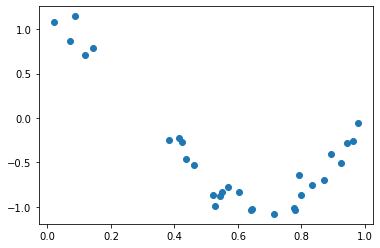

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 X 값에 대해 코사인 변환 값을 변환
def true_fun(X):
    return np.cos(1.5*np.pi*X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X= np.sort(np.random.rand(n_samples))

#y 값은 cosine 기반의 true_fun()에서 약간의 Noise 변동값을 더한 값입니다.
y = true_fun(X)+np.random.randn(n_samples)*0.1
plt.scatter(X,y)
plt.show()


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.41 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417100e+06  2.03717220e+07
 -1.44873987e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE 는 0.41 입니다.


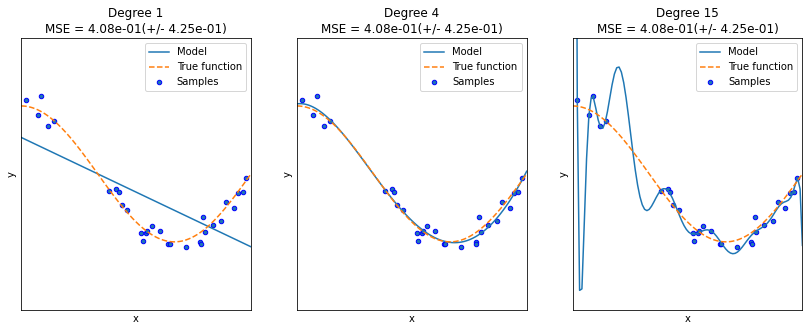

In [44]:
plt.figure(figsize=(14,5))
degrees= [1,4,15]

#다항 회귀의 degree를 1,4,15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees),i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    #개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features',polynomial_features),('linear_regression',linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)
    
    #교차검증으로 다항회귀를 평가합니다.
    scores = cross_val_score(pipline, X.reshape(-1,1),y, scoring='neg_mean_squared_error',cv=10)
    #Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다. >
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),label='Model')
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
plt.show()